In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv(r"C:\Users\aksha\Downloads\iris.csv")
df        

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


<Axes: xlabel='variety', ylabel='count'>

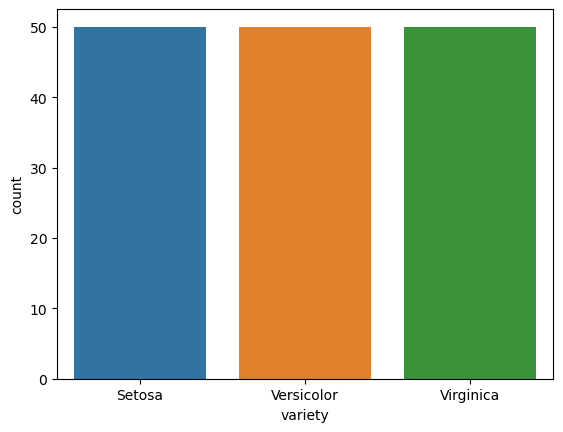

In [3]:
sns.countplot(x='variety',data=df)

In [4]:
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [5]:
df2=df.copy()

In [6]:
df2.drop('variety',axis=1,inplace=True)

In [7]:
df2

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### If we dont know the min samples we can take two or three times the dimension of the dataset

In [8]:
dbscan=DBSCAN(eps=0.5,min_samples=12,)# 3*4=12

In [9]:
dbscan.fit(df2)

DBSCAN(min_samples=12)

In [10]:
dbscan.labels_# here -1 are noice points

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  2,  2, -1, -1, -1, -1, -1,  2,  2,  2, -1, -1,  2,  2, -1, -1,
       -1,  2, -1, -1,  1,  2, -1,  1,  1,  2, -1, -1, -1,  2,  1, -1, -1,
       -1,  2,  1,  2,  2,  2,  1,  2, -1,  2,  1,  2, -1,  1],
      dtype=int64)

In [11]:
df['labels']=dbscan.labels_

In [12]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety,labels
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,1
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,-1


In [13]:
df['labels'].value_counts()

 1    50
 0    46
-1    35
 2    19
Name: labels, dtype: int64

In [14]:
group=df.groupby('labels')
for x,y in group:
    print()
    print(x)
    print('_'*60)
    print(y)


-1
____________________________________________________________
     sepal.length  sepal.width  petal.length  petal.width     variety  labels
14            5.8          4.0           1.2          0.2      Setosa      -1
15            5.7          4.4           1.5          0.4      Setosa      -1
33            5.5          4.2           1.4          0.2      Setosa      -1
41            4.5          2.3           1.3          0.3      Setosa      -1
50            7.0          3.2           4.7          1.4  Versicolor      -1
52            6.9          3.1           4.9          1.5  Versicolor      -1
57            4.9          2.4           3.3          1.0  Versicolor      -1
60            5.0          2.0           3.5          1.0  Versicolor      -1
68            6.2          2.2           4.5          1.5  Versicolor      -1
87            6.3          2.3           4.4          1.3  Versicolor      -1
93            5.0          2.3           3.3          1.0  Versicolor      -1

In [15]:
group.agg('mean')

C:\Users\aksha\AppData\Local\Temp\ipykernel_61000\3204322735.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group.agg('mean')


,sepal.length,sepal.width,petal.length,petal.width
labels,,,,
-1,6.397143,2.962857,4.891429,1.657143
0,4.973913,3.402174,1.471739,0.243478
1,5.968000,2.814000,4.424000,1.420000
2,6.600000,3.036842,5.452632,2.089474


In [16]:
v_group=df.groupby('variety')

In [17]:
v_group.agg('mean')

,sepal.length,sepal.width,petal.length,petal.width,labels
variety,,,,,
Setosa,5.006,3.428,1.462,0.246,-0.08
Versicolor,5.936,2.770,4.260,1.326,0.70
Virginica,6.588,2.974,5.552,2.026,0.44


### Here the setosa,versicolor,virginica clustered by the model and setsosa default is matching(sepal.length	sepal.width	petal.length	petal.width are approxi. similar)


In [18]:
from sklearn.metrics import silhouette_score

In [26]:
silhouette_score(df2,df['labels'])

0.328603663095471

In [28]:
df._get_numeric_data()

,sepal.length,sepal.width,petal.length,petal.width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,-1


In [30]:
new_grp=df._get_numeric_data().groupby('labels')

In [34]:
for x,y in new_grp:
    print('_'*60)
    print()
    print('label',x)
    print(y)

____________________________________________________________

label -1
     sepal.length  sepal.width  petal.length  petal.width  labels
14            5.8          4.0           1.2          0.2      -1
15            5.7          4.4           1.5          0.4      -1
33            5.5          4.2           1.4          0.2      -1
41            4.5          2.3           1.3          0.3      -1
50            7.0          3.2           4.7          1.4      -1
52            6.9          3.1           4.9          1.5      -1
57            4.9          2.4           3.3          1.0      -1
60            5.0          2.0           3.5          1.0      -1
68            6.2          2.2           4.5          1.5      -1
87            6.3          2.3           4.4          1.3      -1
93            5.0          2.3           3.3          1.0      -1
98            5.1          2.5           3.0          1.1      -1
100           6.3          3.3           6.0          2.5      -1
102  

In [35]:
new_grp.agg('mean')

,sepal.length,sepal.width,petal.length,petal.width
labels,,,,
-1,6.397143,2.962857,4.891429,1.657143
0,4.973913,3.402174,1.471739,0.243478
1,5.968000,2.814000,4.424000,1.420000
2,6.600000,3.036842,5.452632,2.089474
